Training data shape: (4800, 100), Test data shape: (600, 100)


E:\python\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 98ms/step - accuracy: 0.2014 - loss: 2.3192 - val_accuracy: 0.4000 - val_loss: 1.8304
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.4718 - loss: 1.6816 - val_accuracy: 0.5200 - val_loss: 1.4307
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.7753 - loss: 0.8989 - val_accuracy: 0.5783 - val_loss: 1.2970
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9330 - loss: 0.4520 - val_accuracy: 0.5967 - val_loss: 1.3003
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.9613 - loss: 0.3218 - val_accuracy: 0.5950 - val_loss: 1.3774
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9699 - loss: 0.2525 - val_accuracy: 0.5967 - val_loss: 1.3515
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9784 - loss: 0.1977 - val_accuracy: 0.5833 - val_loss: 1.4091
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - accuracy: 0.9733 - loss: 0.1860 - 

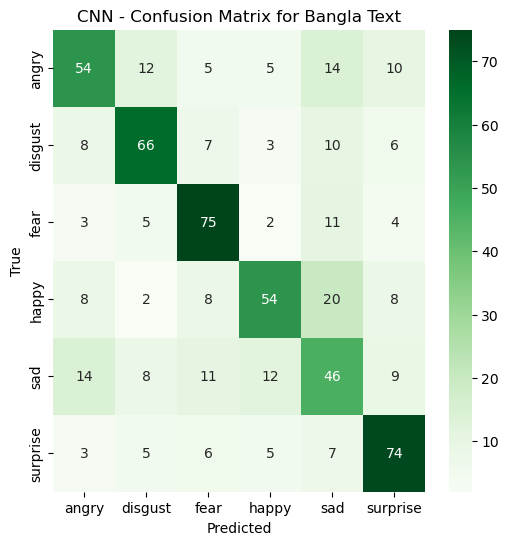

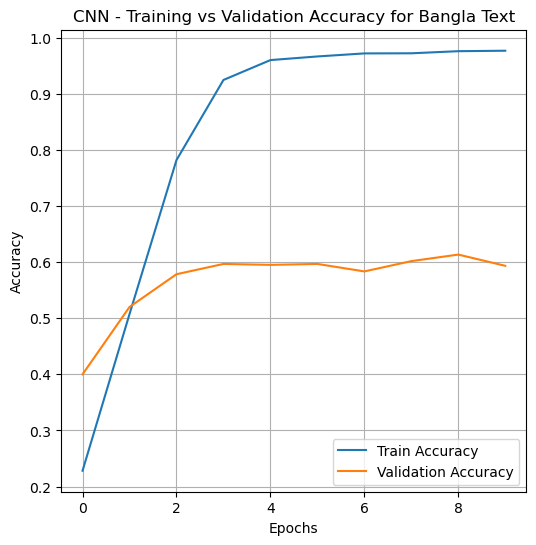

In [5]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load preprocessed data
data_path = 'F:/MS Thesis/RND/BanglaText.csv'
df = pd.read_csv(data_path)

# Encode emotion labels
label_encoder = LabelEncoder()
df['Encoded_Emotion'] = label_encoder.fit_transform(df['Emotion'])
y = df['Encoded_Emotion']

# Tokenization and Padding
MAX_VOCAB_SIZE = 20000
MAX_SEQ_LEN = 100

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df['Cleaned_Text'])

X = tokenizer.texts_to_sequences(df['Cleaned_Text'])
X = pad_sequences(X, maxlen=MAX_SEQ_LEN)

# Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Create CNN model with regularization and dropout
model_cnn = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQ_LEN),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 emotions
])

model_cnn.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Train the model without early stopping
history = model_cnn.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=10, 
    batch_size=32
)

# Evaluate the model
test_loss, test_acc = model_cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Get predictions
y_pred = model_cnn.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(6, 6))  # Set the figure size for the confusion matrix plot
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('CNN - Confusion Matrix for Bangla Text')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Training vs. Validation Accuracy Curve
plt.figure(figsize=(6, 6))  # Set the figure size for the accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN - Training vs Validation Accuracy for Bangla Text')
plt.grid(True)
plt.show()


Training data shape: (4800, 100), Test data shape: (600, 100)


E:\python\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 40s 206ms/step - accuracy: 0.1663 - loss: 2.3474 - val_accuracy: 0.1700 - val_loss: 1.8196
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 31s 203ms/step - accuracy: 0.1892 - loss: 1.7968 - val_accuracy: 0.2533 - val_loss: 1.7102
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 29s 192ms/step - accuracy: 0.3103 - loss: 1.5774 - val_accuracy: 0.3350 - val_loss: 1.6016
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 30s 197ms/step - accuracy: 0.4176 - loss: 1.3290 - val_accuracy: 0.3833 - val_loss: 1.5404
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 30s 200ms/step - accuracy: 0.4981 - loss: 1.1054 - val_accuracy: 0.4350 - val_loss: 1.5270
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 177ms/step - accuracy: 0.5603 - loss: 0.9515 - val_accuracy: 0.4517 - val_loss: 1.5914
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 44s 194ms/step - accuracy: 0.6408 - loss: 0.8643 - val_accuracy: 0.4917 - val_loss: 1.5913
Epoch 8/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.7062 - loss: 0

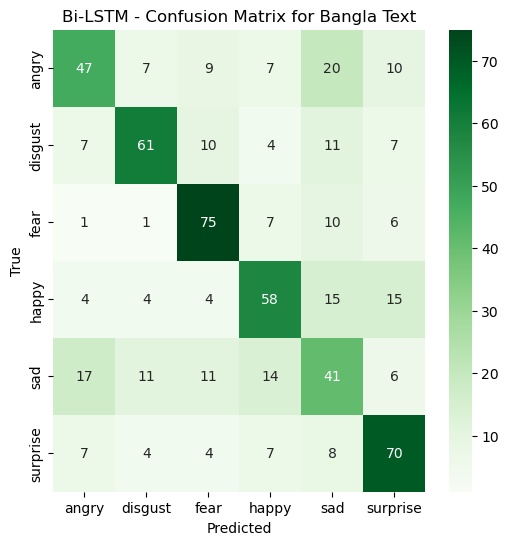

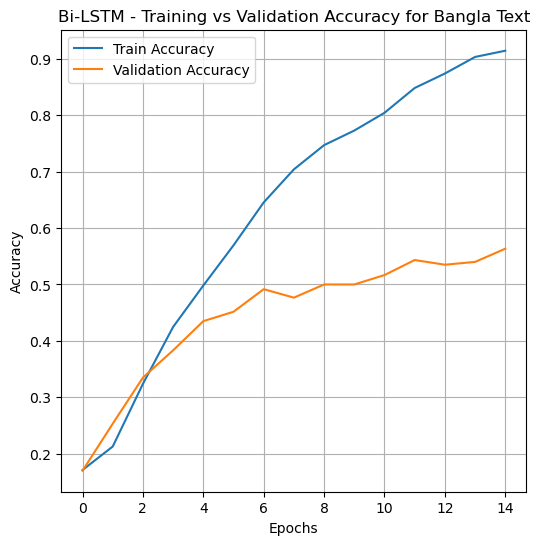

In [3]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load preprocessed data
data_path = 'F:/MS Thesis/RND/BanglaText.csv'
df = pd.read_csv(data_path)

# Encode emotion labels
label_encoder = LabelEncoder()
df['Encoded_Emotion'] = label_encoder.fit_transform(df['Emotion'])
y = df['Encoded_Emotion']

# Tokenization and Padding
MAX_VOCAB_SIZE = 20000
MAX_SEQ_LEN = 100

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df['Cleaned_Text'])

X = tokenizer.texts_to_sequences(df['Cleaned_Text'])
X = pad_sequences(X, maxlen=MAX_SEQ_LEN)

# Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Create Bi-LSTM model with regularization and dropout
model_bi_lstm = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQ_LEN),
    Bidirectional(LSTM(128, dropout=0.5, recurrent_dropout=0.5)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 emotions
])

model_bi_lstm.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Train the model without early stopping
history = model_bi_lstm.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=15,  # Set epochs to 20 as per preference
    batch_size=32
)

# Evaluate the model
test_loss, test_acc = model_bi_lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Get predictions
y_pred = model_bi_lstm.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(6, 6))  # Set the figure size for the confusion matrix plot
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Bi-LSTM - Confusion Matrix for Bangla Text')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Training vs. Validation Accuracy Curve
plt.figure(figsize=(6, 6))  # Set the figure size for the accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Bi-LSTM - Training vs Validation Accuracy for Bangla Text')
plt.grid(True)
plt.show()


Training data shape: (4800, 100), Test data shape: (600, 100)


E:\python\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 70s 239ms/step - accuracy: 0.1814 - loss: 2.2992 - val_accuracy: 0.2050 - val_loss: 1.8297
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 199ms/step - accuracy: 0.2638 - loss: 1.7671 - val_accuracy: 0.2733 - val_loss: 1.6557
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 180ms/step - accuracy: 0.3424 - loss: 1.4956 - val_accuracy: 0.3667 - val_loss: 1.5720
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 173ms/step - accuracy: 0.5089 - loss: 1.2380 - val_accuracy: 0.4533 - val_loss: 1.5201
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 187ms/step - accuracy: 0.6594 - loss: 0.9567 - val_accuracy: 0.5283 - val_loss: 1.4847
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 175ms/step - accuracy: 0.7672 - loss: 0.7342 - val_accuracy: 0.5333 - val_loss: 1.4798
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 173ms/step - accuracy: 0.8268 - loss: 0.5780 - val_accuracy: 0.5617 - val_loss: 1.5032
Epoch 8/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 165ms/step - accuracy: 0.8579 - loss: 0

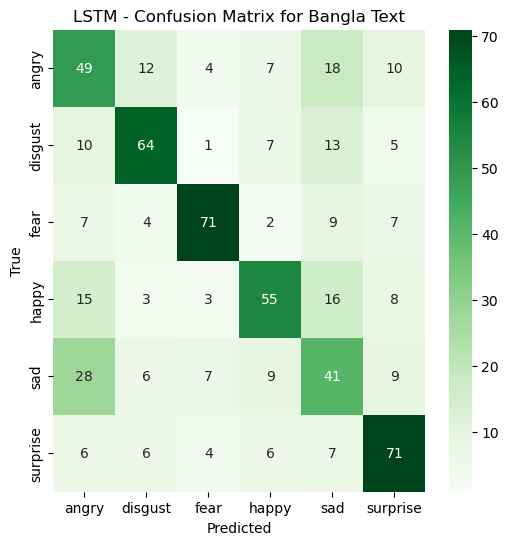

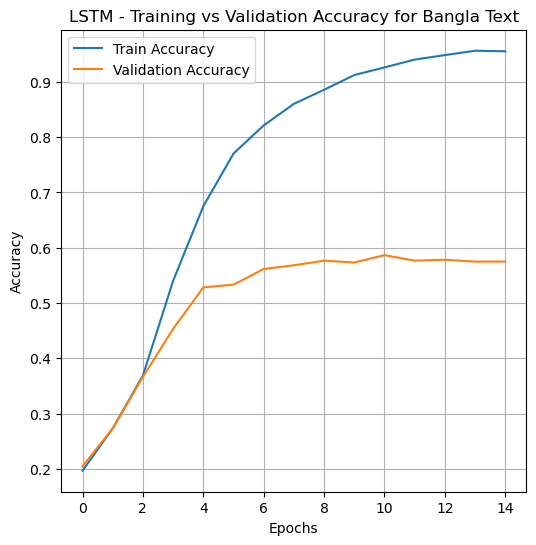

In [2]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load preprocessed data
data_path = 'F:/MS Thesis/RND/BanglaText.csv'
df = pd.read_csv(data_path)

# Encode emotion labels
label_encoder = LabelEncoder()
df['Encoded_Emotion'] = label_encoder.fit_transform(df['Emotion'])
y = df['Encoded_Emotion']

# Tokenization and Padding
MAX_VOCAB_SIZE = 20000
MAX_SEQ_LEN = 100

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df['Cleaned_Text'])

X = tokenizer.texts_to_sequences(df['Cleaned_Text'])
X = pad_sequences(X, maxlen=MAX_SEQ_LEN)

# Train-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Create LSTM model with regularization and dropout
model_lstm = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=128, input_length=MAX_SEQ_LEN),
    LSTM(128, dropout=0.5, recurrent_dropout=0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 emotions
])

model_lstm.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Train the model without early stopping
history = model_lstm.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=15,  # Set epochs to 10 as per preference
    batch_size=32
)

# Evaluate the model
test_loss, test_acc = model_lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Get predictions
y_pred = model_lstm.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_labels, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(6, 6))  # Set the figure size for the confusion matrix plot
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('LSTM - Confusion Matrix for Bangla Text')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Training vs. Validation Accuracy Curve
plt.figure(figsize=(6, 6))  # Set the figure size for the accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM - Training vs Validation Accuracy for Bangla Text')
plt.grid(True)
plt.show()
